In [46]:
''' 
    This cell is prepared to provide solution to the first question of the practical task
    Question 1: Find top 10 countries that grew "Gross domestic product per capita" the most over the last decade

    I used WEO subject code PPPPC because it is the universal indicator GDP growth per capita 

'''

# Import pandas library
import pandas as pd
import os

#import matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("../data/dataset.xlsx")

# Storing every country name
countries = df["Country"].unique()

growth_rates = {}
average_growth_rates = {}

# The start year of the last decade
start_year = 2014

# The end year of the last decade
end_year = 2024

# Calculating the growth rate of every country year by year for last decade
for country in countries:
    # Skip calculation for Lebanon
    if country != "Lebanon":
        # Extract rows related to PPPPC for the current country
        pppc_row = df.loc[(df["WEO Subject Code"] == "PPPPC") & (df["Country"] == country)]
        # Extract columns for the specified years
        last_decade_info = pppc_row.loc[:, start_year:end_year]
        # Calculate growth rate year by year and calculate the percentage
        growth_rate = ((last_decade_info.iloc[:, 1:].values - last_decade_info.iloc[:, :-1].values) / last_decade_info.iloc[:, :-1].values) * 100
        # Store growth rates for the country for the last decade
        growth_rates[country] = growth_rate

# Calculate average growth rates for each country
for country, growth_rate in growth_rates.items():
    # Calculating mean for the growth rates of the last decade
    average_growth_rate = growth_rate.mean(axis=1)
    # Storing the calculated mean to the dictionary
    average_growth_rates[country] = average_growth_rate

# Convert average growth rates to DataFrame
average_growth_rates_df = pd.DataFrame(average_growth_rates)

# Sort countries by their growth rates and get the top 10
top_10_countries = average_growth_rates_df.T.sort_values(by=0, ascending=False).head(10)

print(top_10_countries)


                    0
Libya       13.683882
Guyana      11.948329
Ireland      8.195606
Ethiopia     8.021842
Bangladesh   7.595905
Moldova      7.537589
Vietnam      7.432745
Cambodia     6.521228
China        6.502886
Guinea       6.482519


In [46]:
''' 
    This cell is prepared to answer the second question on the practical task
    Question 2: Draw OECD countries' "Population" growth over the last decade

    I attempted to save the population growth for each country in a separate PNG file because plotting the growth
    for all 38 countries together doesn't seem feasible and would make the plot incomprehensible. I saved the
    files in the 'population_growth' folder.
'''

# List of OECD countries
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "South Korea",
    "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand",
    "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom", "United States"
]

# Container to store population growth data for OECD countries
population_growth_container = {}

# Iterate over countries and extract population growth data
for country in countries:
    if country != "Lebanon" and country in oecd_countries:
        # Extract population growth data for the country
        population_row = df.loc[(df["Country"] == country) & (df["WEO Subject Code"] == "LP")]
        last_decade_info = population_row.loc[:, start_year:end_year]
        population_growth_container[country] = last_decade_info

# Directory to save the PNG files
save_dir = "../population_growth/"

# Plot and save population growth for each country
for country, data in population_growth_container.items():
    # Create a new figure for each country
    plt.figure(figsize=(8, 6))
    
    # Plot population growth
    plt.plot(data.columns, data.values.flatten())
    
    # Set title and labels
    plt.title(f"Population growth of {country} over the last decade")
    plt.xlabel("Year")
    plt.ylabel("Population in millions")
    
    # Customize the plot
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Save the plot as a PNG file in the specified directory
    plt.savefig(os.path.join(save_dir, f"{country}_population_growth_2014-2024.png"))
    
    # Close the current figure to release memory
    plt.close()



In [47]:
''' 
    This cell is prepared to answer the third question on the practical task
    Question 3: Save the GDP growth figures in separate charts and save them as PNG files

    I saved the GDP growth figures as PNG files at GDP_growth folder

'''

# List of OECD countries
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "South Korea",
    "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand",
    "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom", "United States"
]

# Container to store GDP growth data for OECD countries
population_growth_container = {}

# Iterate over countries and extract GDP growth data
for country in countries:
    if country != "Lebanon" and country in oecd_countries:
        # Extract GDP growth data for the country
        population_row = df.loc[(df["Country"] == country) & (df["WEO Subject Code"] == "PPPPC")]
        last_decade_info = population_row.loc[:, start_year:end_year]
        population_growth_container[country] = last_decade_info

# Directory to save the PNG files
save_dir = "../GDP_growth/"

# Plot and save GDP growth for each country
for country, data in population_growth_container.items():
    # Create a new figure for each country
    plt.figure(figsize=(8, 6))
    
    # Plot GDP growth data as bar graph
    plt.bar(data.columns, data.values.flatten())
    
    # Set title and labels
    plt.title(f"GDP growth of {country} over the last decade")
    plt.xlabel("Year")
    plt.ylabel("PPP dollars per person")
    
    # Customize the plot
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Save the bar graph as a PNG file in the specified directory
    plt.savefig(os.path.join(save_dir, f"{country}_GDP_growth_2014-2024.png"))
    
    # Close the current figure to release memory
    plt.close()



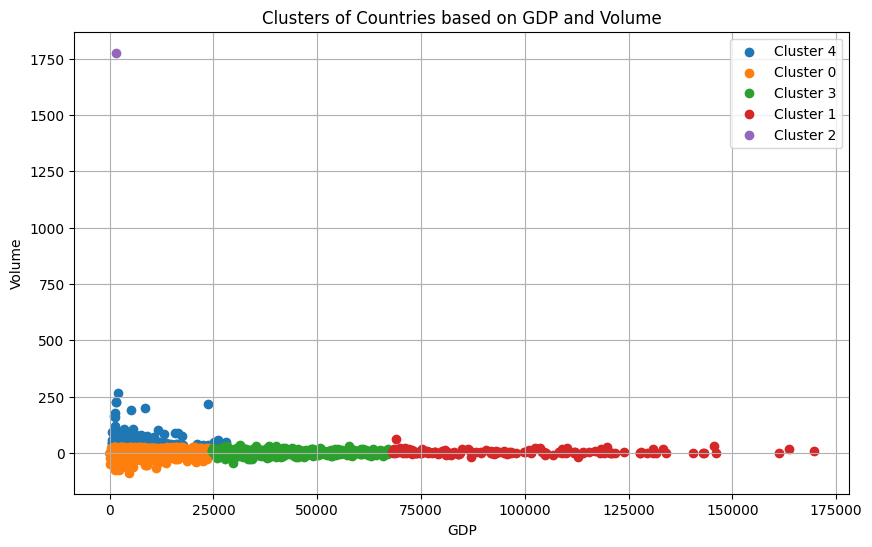

In [98]:
'''
    This cell is prepared to solve the fourth question on the practical task
    Question 4: Create 5 clusters out of the countries using GDP and "Volume of exports of goods"
                A. draw the charts (x-axis - GDP, y - volume)
                B. Add labels for the top 5 countries according to the GDP on the dots representing countries in each cluster

'''

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

save_dir = "../clusters/"
# Starting working on question 4 A
# Step 1: Extract relevant data for clustering
country_data = {}
for country in countries:
    # Getting rows of GDP per capita and Volume of exports of goods based on their weo subject code
    rows = df.loc[((df["WEO Subject Code"] == "PPPPC") | (df["WEO Subject Code"] == "TXG_RPCH")) & (df["Country"] == country)]
    data_row = rows.loc[:, 2003:2025].values
    country_data[country] = data_row

# Step 2: Create DataFrame from extracted data
dfs = []
for country, values in country_data.items():
    if country != "Lebanon":
        df_country = pd.DataFrame(values).T
        df_country.columns = ["GDP", "Volume"]
        df_country.index.name = 'Year'
        df_country['Country'] = country
        dfs.append(df_country)

result_df = pd.concat(dfs)
result_df.set_index('Country', inplace=True)
result_df = result_df.apply(pd.to_numeric, errors='coerce')
result_df.fillna(0, inplace=True)

# Step 3: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(result_df)

# Step 4: Apply K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# Step 5: Visualize the Clusters
result_df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
for cluster in result_df['Cluster'].unique():
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data['GDP'], cluster_data['Volume'], label=f'Cluster {cluster}')

plt.xlabel('GDP')
plt.ylabel('Volume')
plt.title('Clusters of Countries based on GDP and Volume')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Generate Separate Plots for Each Cluster and save them on distinguished PNG file
for cluster in result_df['Cluster'].unique():
    plt.figure(figsize=(10, 6))
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data['GDP'], cluster_data['Volume'], label=f'Cluster {cluster}')
    
    # Add labels for the top 5 countries according to GDP
    top_countries = cluster_data.nlargest(5, 'GDP')
    for i, (index, row) in enumerate(top_countries.iterrows(), 1):
        plt.annotate(f"{i}", (row['GDP'], row['Volume']), xytext=(5, -5), textcoords='offset points', ha='left', va='top', rotation=90)
    
    # Add legend with country names and ranks
    legend_labels = [f"{i}: {index}" for i, (index, _) in enumerate(top_countries.iterrows(), 1)]
    for label in legend_labels:
        plt.plot([], [], label=label)  # Add an empty plot for each legend entry
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.xlabel('GDP')
    plt.ylabel('Volume')
    plt.title(f'Cluster {cluster}: Countries based on GDP and Volume')
    plt.grid(True)
    
    # Save the plot as a PNG file
    plt.savefig(os.path.join(save_dir, f'cluster_{cluster}.png'), bbox_inches='tight')  # Use bbox_inches='tight' to include legend properly
    plt.close()






